# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

(array([8., 8., 8., 7., 8., 8., 7., 8., 8., 7., 8., 8., 8., 7., 8., 8., 7.,
        8., 8., 8.]),
 array([  1. ,   8.7,  16.4,  24.1,  31.8,  39.5,  47.2,  54.9,  62.6,
         70.3,  78. ,  85.7,  93.4, 101.1, 108.8, 116.5, 124.2, 131.9,
        139.6, 147.3, 155. ]),
 <a list of 20 Patch objects>)

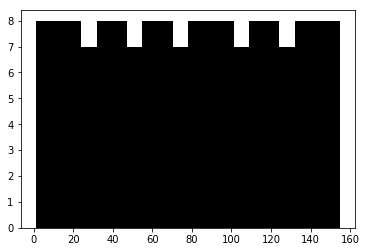

In [43]:
plt.hist(df['Freedom'], 20, facecolor = 'black')
#Равномерное на [1, 155]

(array([8., 8., 8., 7., 8., 8., 7., 8., 8., 7., 8., 8., 8., 7., 8., 8., 7.,
        8., 8., 8.]),
 array([  1. ,   8.7,  16.4,  24.1,  31.8,  39.5,  47.2,  54.9,  62.6,
         70.3,  78. ,  85.7,  93.4, 101.1, 108.8, 116.5, 124.2, 131.9,
        139.6, 147.3, 155. ]),
 <a list of 20 Patch objects>)

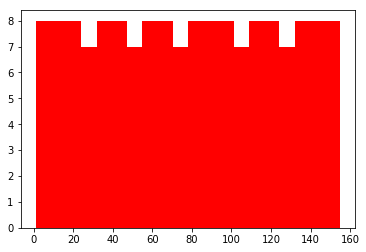

In [41]:
plt.hist(df['Positive affect'], 20, facecolor = 'r')
#Равномерное на [1, 155]

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [63]:
max_ = max(df[df['Freedom'].isna() == False]['Freedom'])
min_ = min(df[df['Freedom'].isna() == False]['Freedom'])

print('Медиана: ', statistics.median(df[df['Freedom'].isna() == False]['Freedom']))
#print('Мода: ', statistics.mode(df[df['Freedom'].isna() == False]['Freedom']))
#Нельзя посчитать моду на этих данных
print('E: ', statistics.mean(df[df['Freedom'].isna() == False]['Freedom']))
print('SD: ', statistics.pstdev(df[df['Freedom'].isna() == False]['Freedom']))
print('VaR: ', statistics.pvariance(df[df['Freedom'].isna() == False]['Freedom']))
print('min: ',max_)
print('max: ', min_)
print('Num outshoots: ', df['Freedom'].isna().sum())
print('Duration: ', max_ - min_)


Медиана:  78.0
E:  78.0
SD:  44.74371464239419
VaR:  2002.0
min:  155.0
max:  1.0
Num outshoots:  1
Duration:  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Corr:  0.6817698430601656


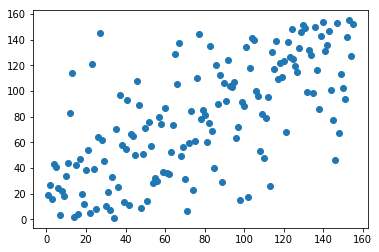

In [68]:
Freed = df[df['Freedom'].isna() == False]['Freedom']
Pos = df[df['Positive affect'].isna() == False]['Positive affect']

plt.scatter(Freed, Pos)
print('Corr: ', sts.pearsonr(Freed, Pos)[0])
#Знак означает положительную зависимость. при росте первого растет второе

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [69]:
Freedom = df[df['Freedom'].isna() == False]['Freedom'] - statistics.mean(df[df['Freedom'].isna() == False]['Freedom'])

Построить матрицу корреляций для всех колонок таблицы

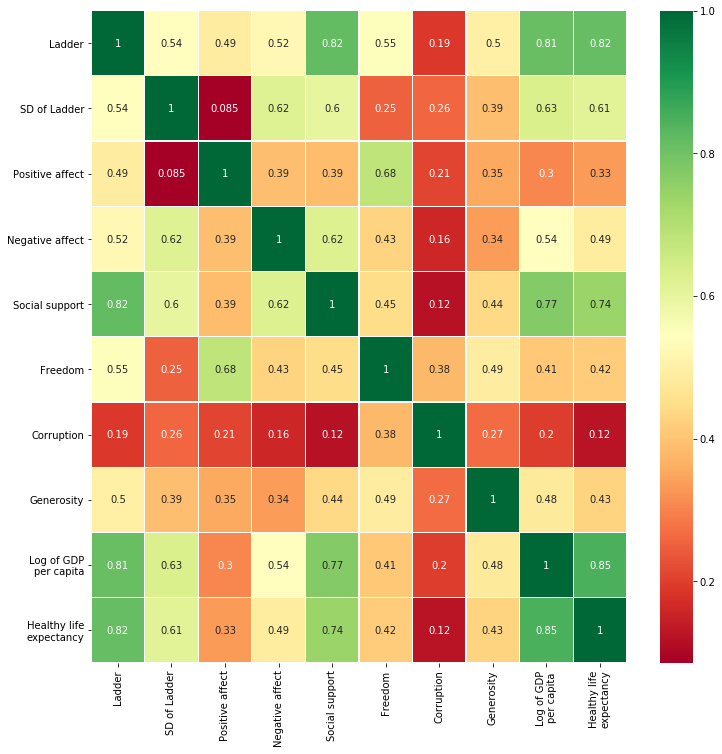

In [74]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [75]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([  64.,  267.,  860., 1772., 2409., 2415., 2191., 2315., 1931.,
        1481., 1051.,  621.,  352.,  246.,   92.,   85.,   47.,   39.,
           8.,    3.]),
 array([0.44  , 0.5805, 0.721 , 0.8615, 1.002 , 1.1425, 1.283 , 1.4235,
        1.564 , 1.7045, 1.845 , 1.9855, 2.126 , 2.2665, 2.407 , 2.5475,
        2.688 , 2.8285, 2.969 , 3.1095, 3.25  ]),
 <a list of 20 Patch objects>)

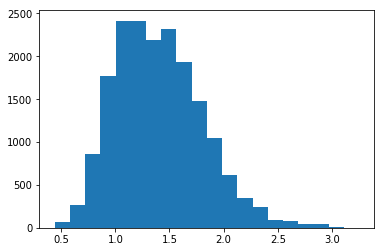

In [76]:
plt.hist(df['AveragePrice'], 20)
#Нормальное

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [77]:
Num_ = df[df['4046'].isna() == False]['4046']
Av_pr = df[df['AveragePrice'].isna() == False]['AveragePrice']

print('Corr: ', sts.pearsonr(Num_, Av_pr)[0])

Corr:  -0.20831704848788477
